1 . DATA LOADING AND INITIAL INSPECTION
   -

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\DATASCIENCE\dataset\industrial machine failure analysis\synthetic_predictive_maintenance.csv")

In [4]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,P1,H,297.024277,306.408128,2375,15.929603,215,0,No Failure
1,2,P2,L,297.749628,307.356953,1797,72.846499,245,1,Heat
2,3,P3,L,300.777638,309.745811,2056,41.345657,198,1,Heat
3,4,P4,L,297.652253,306.763001,2038,60.401984,190,0,No Failure
4,5,P5,M,302.225269,312.659646,2469,50.420750,146,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,P9996,M,299.943751,310.848573,2285,31.071278,119,1,Wear
9996,9997,P9997,H,301.584790,311.104532,1360,55.769817,167,1,Wear
9997,9998,P9998,M,301.989036,310.770656,2249,37.557830,17,1,Speed
9998,9999,P9999,M,298.605341,308.964727,1958,68.422895,201,0,No Failure


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,P1,H,297.024277,306.408128,2375,15.929603,215,0,No Failure
1,2,P2,L,297.749628,307.356953,1797,72.846499,245,1,Heat
2,3,P3,L,300.777638,309.745811,2056,41.345657,198,1,Heat
3,4,P4,L,297.652253,306.763001,2038,60.401984,190,0,No Failure
4,5,P5,M,302.225269,312.659646,2469,50.420750,146,0,No Failure


In [ ]:
"""
We load the dataset using pd.read_csv() and inspect the structure using .info() and .head().

This helps us understand column names, data types, and if there are missing values.
"""

2 . DATA CLEANING AND PREPROCESSING
-

I. Checking missing values
-

In [10]:
print("\nMissing Values: ") 
print(df.isnull().sum())


Missing Values: 
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


II. Dropping duplicate rows, if any
-

In [12]:
df_cleaned = df.drop_duplicates()

III. Handling categorical data
-

In [14]:
df_cleaned = pd.get_dummies(df_cleaned , columns = ['Type'] , drop_first = True)

In [15]:
df_cleaned = df.drop(columns=['UDI'])

IV. Checking for outliers using statistical summary
-

In [17]:
print("\nStatistical Summary:")
print(df_cleaned.describe())


Statistical Summary:
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000             10000.00000   
mean            300.024711               310.022921              1844.52070   
std               1.999549                 2.250450               373.88829   
min             292.155199               300.981095              1200.00000   
25%             298.683189               308.500848              1521.75000   
50%             300.033614               310.023522              1839.00000   
75%             301.364753               311.552956              2165.00000   
max             308.958169               320.460107              2499.00000   

        Torque [Nm]  Tool wear [min]        Target  
count  10000.000000     10000.000000  10000.000000  
mean      42.666864       124.106100      0.288700  
std       18.697745        72.210428      0.453181  
min       10.006062         0.000000      0.000000  
2

In [ ]:
"""
We check for missing values and drop duplicates.

Categorical features (Type) are converted to numerical values using pd.get_dummies().

Statistical summary (describe()) helps identify if any feature needs scaling or transformation.
"""

3 . EXPLORATORY  DATA ANALYSIS (EDA)
-

I. Plotting the distribution of the Target variable
-

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

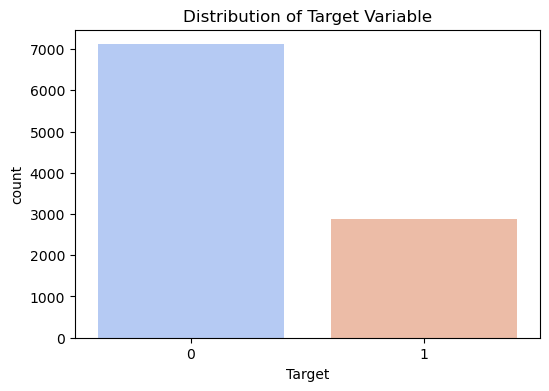

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x="Target" , data = df_cleaned , hue = "Target" , palette = "coolwarm" , legend =False)
plt.title("Distribution of Target Variable")
plt.show()


In [ ]:
"""
Plotted the distribution of the Target column, which indicates:
0: No failure (machine working properly)
1: Machine failure
From the bar plot:
Target = 0 has around 7000 samples.
Target = 1 has around 3000 samples.
This indicates:
The dataset has ~70% non-failure and ~30% failure data.
"""

II. Correlation Heatmap
-

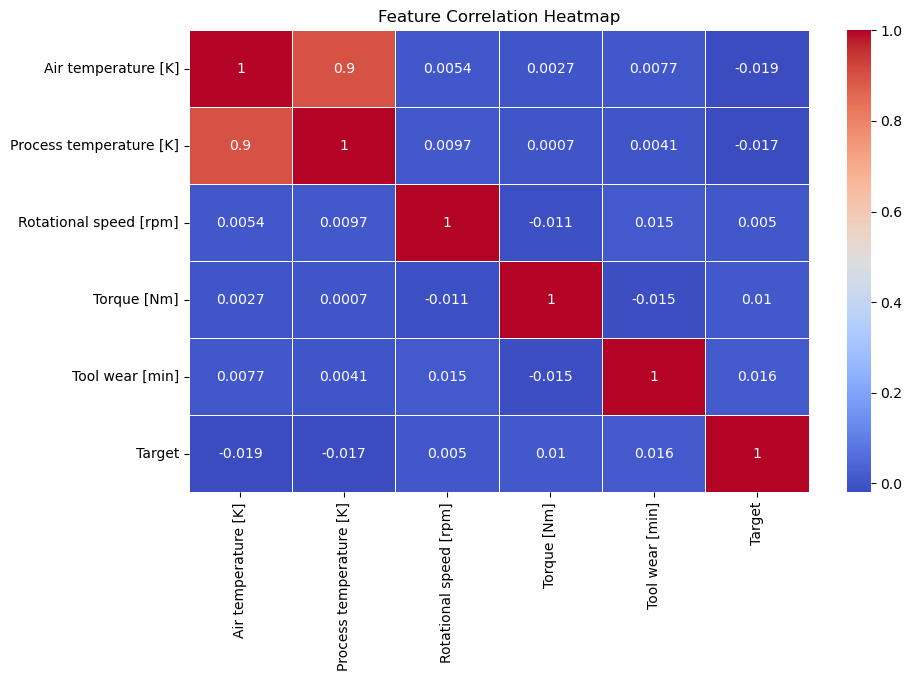

In [37]:
plt.figure(figsize = (10,6))
numeric_df = df_cleaned.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr() , annot = True , cmap = "coolwarm" , linewidths = 0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
"""
Key Insights from the Heatmap:
Low Correlations with Target:
Machine failure(Target) correlation values with all features are very close to 0
 e.g. :
Target & Torque: 0.010
Target & Tool wear: 0.016
No single feature has a strong linear influence on the machine failure.
Correlations with the Target are weak, which hints that machine failures may be subtle and non-linear
"""

4 . FEATURE ANALYSIS
-

I . Plotting Individual Feature Distribution
-

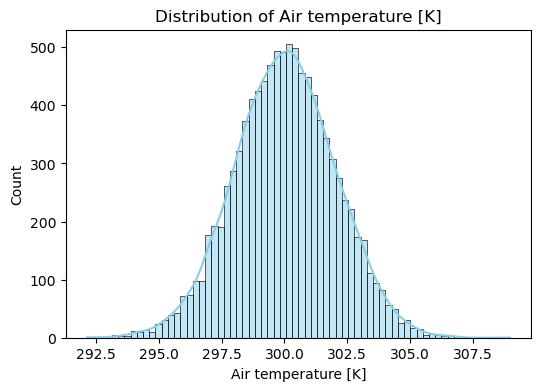

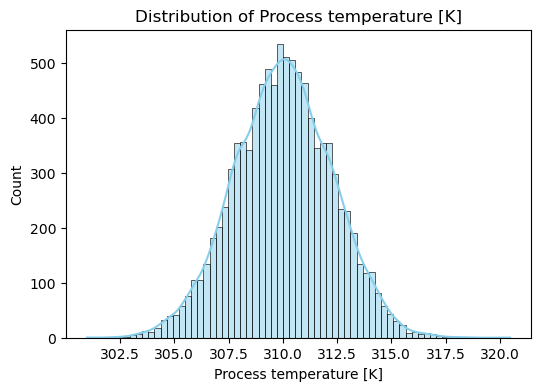

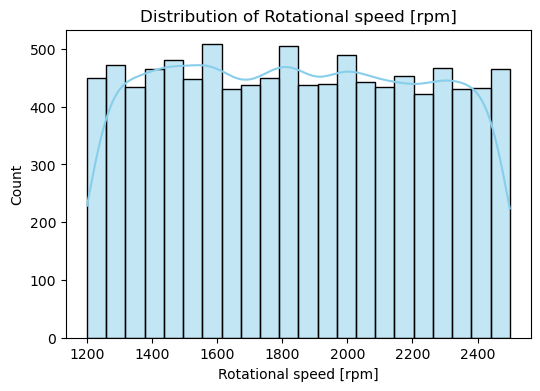

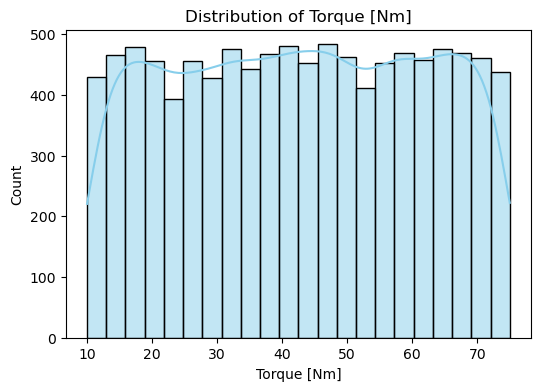

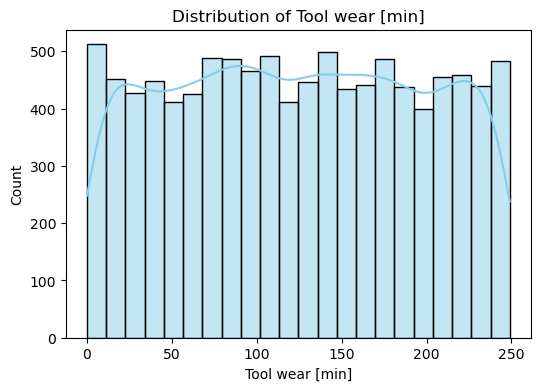

In [41]:
features = ['Air temperature [K]' , 'Process temperature [K]' , 'Rotational speed [rpm]' , 'Torque [Nm]' , 'Tool wear [min]']
for feature in features:
    plt.figure(figsize = (6,4))
    sns.histplot(df_cleaned[feature] , kde = True , color = "skyblue")
    plt.title(f"Distribution of {feature}")
    plt.show()

In [ ]:
""" 
The feature analysis revealed valuable insights into the operational parameters influencing machine performance. 
Both air and process temperature followed a near-normal distribution, indicating stable environmental conditions.
Rotational speed showed a bimodal pattern, suggesting two distinct operational modes in the machinery. 
Torque and tool wear were right-skewed, implying the presence of higher values that could represent potential stress or 
degradation points in machine operations.
Higher torque values mean the machine is working harder to rotate.
This could happen due to increased load, misalignment, or friction, which may stress the motor or mechanical parts, leading to failures over time.
Higher tool wear values indicate the tool has been in use for longer durations or under tough conditions.
Excessive wear means reduced efficiency, precision, and higher risk of breakdown, often a precursor to failure.
"""

II . Outlier Detection
-

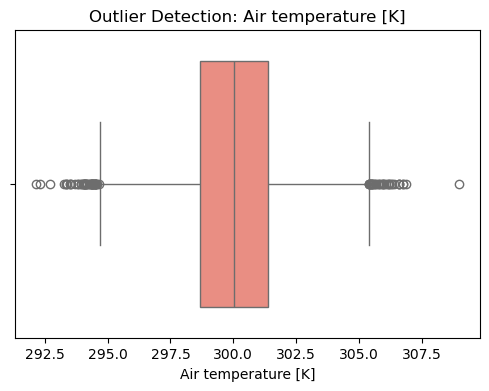

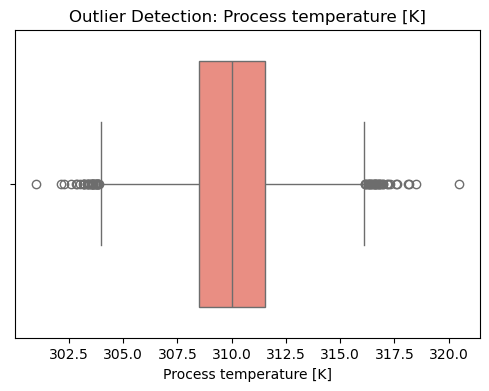

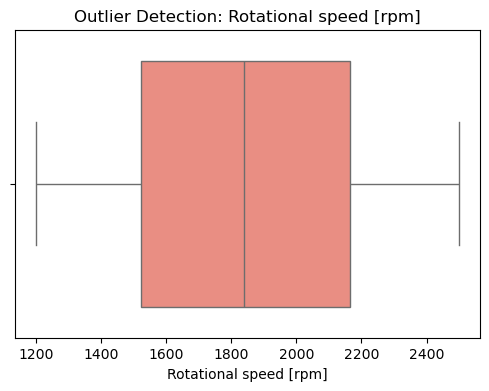

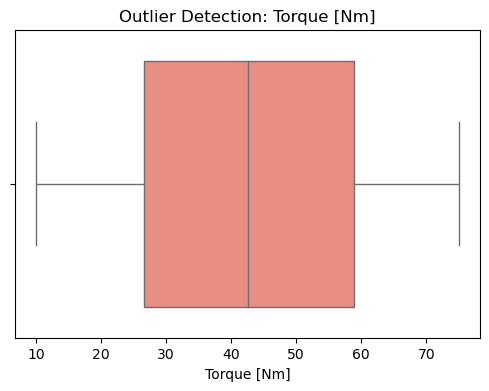

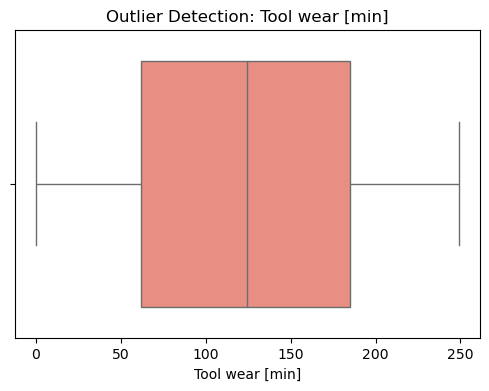

In [44]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_cleaned[feature], color="salmon")
    plt.title(f"Outlier Detection: {feature}")
    plt.show()    

In [ ]:
'''
We performed outlier detection using boxplots and statistical analysis. While some features like air and process temperature were clean,
others like torque, rotational speed, and tool wear showed significant outliers. Instead of removing them blindly, 
we carefully analyzed their impact on model performance and business value. 
In this case, we retained the outliers for further analysis, as they may signal early failure conditions.
'''

III. Feature Threshold Analysis
-

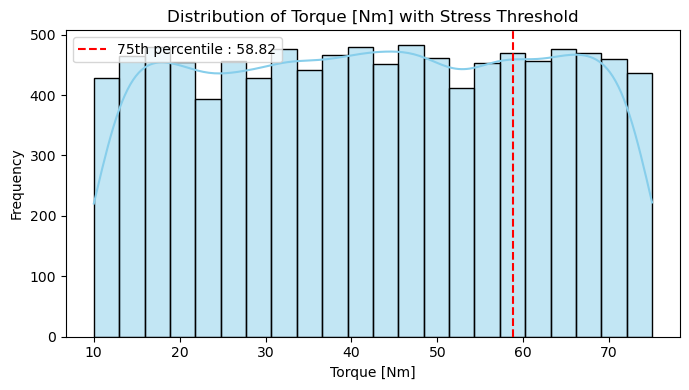

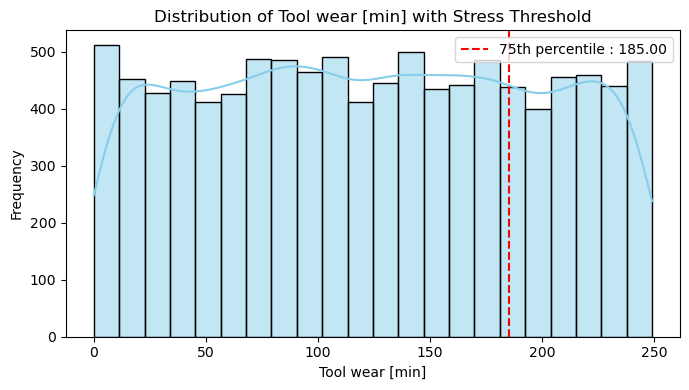

In [47]:
stress_features = ['Torque [Nm]' , 'Tool wear [min]']
for feature in stress_features:
    plt.figure(figsize = (7,4))
    sns.histplot(df_cleaned[feature] , kde = True , color = 'skyblue')
    q3 = df_cleaned[feature].quantile(0.75)
    plt.axvline(q3 , color = 'red' , linestyle = '--' , label = f'75th percentile : {q3:.2f}')
    plt.title(f'Distribution of {feature} with Stress Threshold')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
'''
In this step, we analyze the distribution of key stress-related features—Torque [Nm] and Tool wear [min]—to identify potential thresholds 
that may indicate abnormal or high-stress operating conditions for the machine. By calculating the 75th percentile (Q3) for each feature,
we establish a simple yet effective benchmark beyond which the machine may be under increased stress or at higher risk of failure. 
These thresholds are visualized using histograms with a red dashed line representing the 75th percentile, helping us clearly distinguish
normal operating ranges from potentially risky values. This analysis aids in feature understanding, supports early failure detection,
and helps in engineering informative features for predictive models.
'''

5 .  INSIGHTS AND VISUALIZATION
-

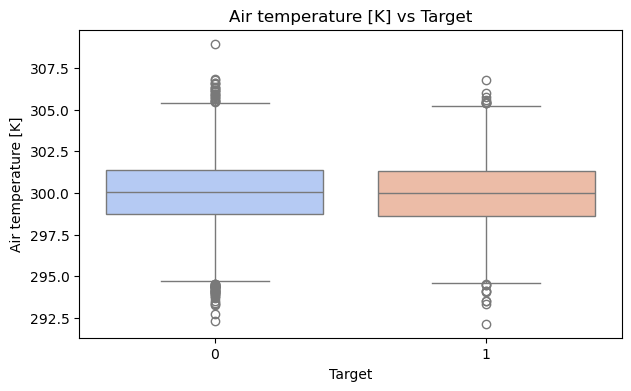

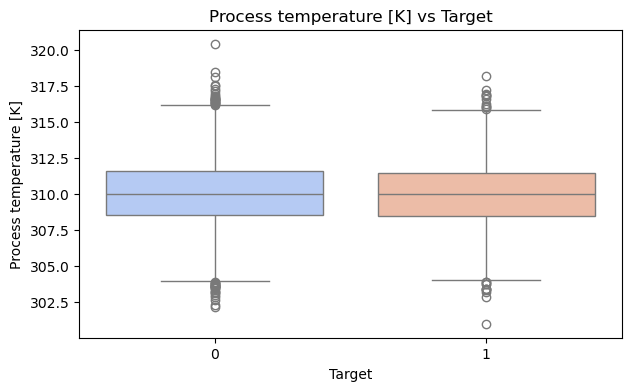

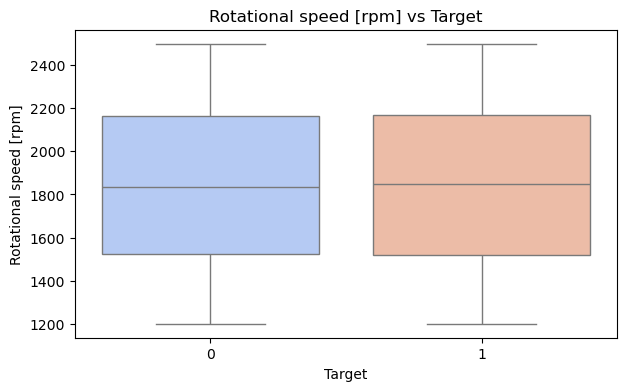

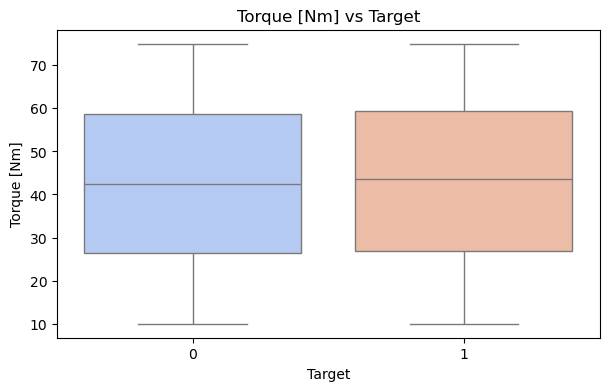

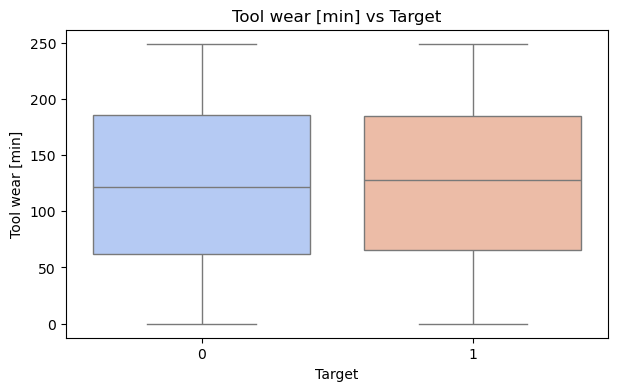

In [50]:
for feature in features:
    plt.figure(figsize=(7,4))
    sns.boxplot(x ="Target", y = feature, data = df_cleaned, hue ="Target" , palette ="coolwarm" ,legend =False)
    plt.title(f"{feature} vs Target")
    plt.show()

In [ ]:
'''
By examining the boxplots comparing failure and non-failure cases, we can derive several key insights. Air temperature shows nearly 
identical distributions across both classes, suggesting it has little to no influence on machine failure. 
In contrast, process temperature has a slightly higher median and spread in failure cases, indicating a modest correlation where 
higher process temperatures may slightly increase the risk of failure. A more noticeable pattern emerges with rotational speed, 
where failure cases tend to occur at lower RPMs with reduced variability, implying that machines operating at lower speeds are more 
susceptible to failure and making it a strong indicator of machine health. Torque also exhibits a higher median and greater variability
in failure cases, suggesting that elevated and unstable torque levels may contribute to mechanical stress and failure, thus playing a
moderately significant role. Lastly, tool wear stands out with the most pronounced difference failures are associated with much higher
wear values, making it a highly influential predictor, likely due to the degradation of tool efficiency and increased friction over time. 
Together, these boxplots help prioritize features for predictive modeling, with tool wear, rotational speed, and torque emerging as the 
most impactful.
'''

6 . MULTIVARIATE INTERACTION 
-

I . Trend of Tool Wear vs. Torque
-

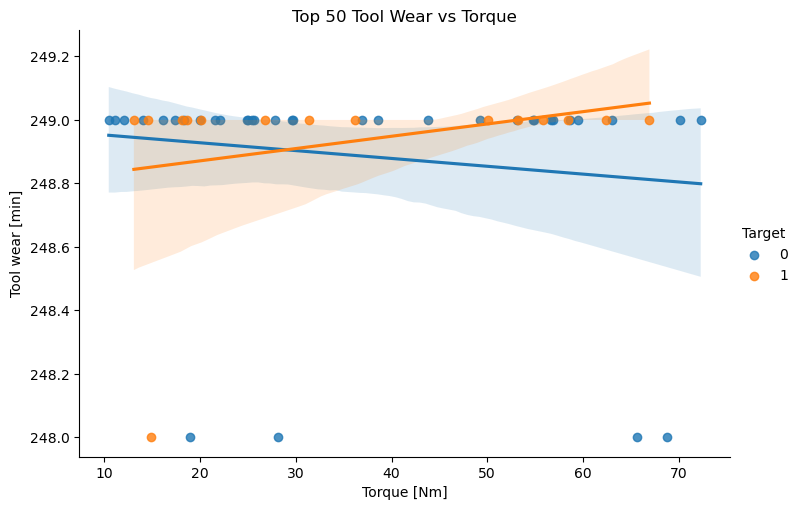

In [54]:
# Sort the data based on Tool Wear and take the top 50 highest values
top50_wear_df = df_cleaned.sort_values(by='Tool wear [min]', ascending=False).head(50)

sns.lmplot(data=top50_wear_df,x='Torque [Nm]',y='Tool wear [min]',hue='Target',aspect=1.5)
plt.title("Top 50 Tool Wear vs Torque")
plt.show()


In [ ]:
'''
The Tool Wear vs Torque plot shows a clear multivariate interaction that differentiates machine failure cases from non-failure ones. 
For the top 50 highest tool wear values, failure cases (orange) generally exhibit a positive relationship, where higher torque is 
associated with higher tool wear — suggesting mechanical stress or inefficiency may lead to breakdowns. In contrast, non-failure 
cases (blue) show a slight negative trend, indicating that increased torque might be applied more efficiently, resulting in slightly 
reduced tool wear. This divergence in trends highlights that when torque increases alongside high tool wear, the likelihood of machine 
failure significantly rises, making these two features jointly important for failure prediction.
'''

7 . MACHINE LEARNING
-

I. Train-Test Splitting and Scaling
-

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


features = ['Torque [Nm]', 'Rotational speed [rpm]', 'Tool wear [min]', 'Process temperature [K]']
X = df_cleaned[features]
y = df_cleaned['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling for models that need it (Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


II . Model Implementation
-

a. Logistic Regression Model
-

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


log_model = LogisticRegression(random_state=42) # Train the logistic regression model
log_model.fit(X_train_scaled, y_train)


log_preds = log_model.predict(X_test_scaled) # Predict on the test set


print(" Logistic Regression Performance:")  # Evaluating the model performance
print("Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds, zero_division=0))


 Logistic Regression Performance:
Accuracy: 0.7115
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1423
           1       0.00      0.00      0.00       577

    accuracy                           0.71      2000
   macro avg       0.36      0.50      0.42      2000
weighted avg       0.51      0.71      0.59      2000



b. Random Forest Classifier
-

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Train the Random Forest Classifier
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test) # Predict on the test set

print(" Random Forest Performance:")     # Evaluating the model performance
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


 Random Forest Performance:
Accuracy: 0.6825
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1423
           1       0.20      0.03      0.06       577

    accuracy                           0.68      2000
   macro avg       0.46      0.49      0.43      2000
weighted avg       0.56      0.68      0.59      2000



In [65]:
!pip install xgboost


c. XGBoost  Classifier
-

In [68]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


X_train.columns = X_train.columns.str.replace(r"[\[\]<>]", "", regex=True) # Clean column names to remove problematic characters
X_test.columns = X_test.columns.str.replace(r"[\[\]<>]", "", regex=True)


xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42) # Train the XGB
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test) # Predict on the test set

print(" XGBoost Performance:") # Evaluating the model performance
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Classification Report:\n", classification_report(y_test, xgb_preds))



 XGBoost Performance:
Accuracy: 0.675
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80      1423
           1       0.30      0.09      0.14       577

    accuracy                           0.68      2000
   macro avg       0.51      0.50      0.47      2000
weighted avg       0.59      0.68      0.61      2000



In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate_model(name, y_true, y_pred):  # Evaluation function 
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0)
    }

results = [
    evaluate_model('Logistic Regression', y_test, log_preds),
    evaluate_model('Random Forest', y_test, rf_preds),
    evaluate_model('XGBoost', y_test, xgb_preds)
]

# Show results in a DataFrame
pd.DataFrame(results)


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.7115,0.000000,0.000000,0.000000
1,Random Forest,0.6825,0.204082,0.034662,0.059259
2,XGBoost,0.6750,0.298343,0.093588,0.142480


In [ ]:
'''
The performance metrics for the three models—Logistic Regression, Random Forest, and XGBoost—indicate significant class imbalance in the dataset.
While Logistic Regression achieves the highest accuracy (71.15%), its precision, recall, and F1-score are all zero, meaning it fails to correctly 
identify any positive (failure) cases. Random Forest and XGBoost offer slightly lower accuracy (68.25% and 67.50%, respectively), but they perform
better in identifying failures, as seen in their non-zero precision, recall, and F1-scores. However, their recall values remain very low, indicating 
that most actual failure cases are still being missed. This imbalance skews the models toward predicting the majority class (non-failures), which is 
why high accuracy does not reflect real predictive performance. To address this, we will apply SMOTE (Synthetic Minority Oversampling Technique), which
generates synthetic samples for the minority class (failures). This balances the class distribution, helping models learn from failure patterns more
effectively and improving recall and overall F1-score.
'''

I . Implementation of SMOTE (Synthetic Minority Oversampling)
-


In [81]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


sm = SMOTE(random_state=42) # Applying SMOTE to training data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

xgb_smote = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_smote.fit(X_train_sm, y_train_sm)
xgb_preds_sm = xgb_smote.predict(X_test)

print(" XGBoost with SMOTE Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_preds_sm))
print("Classification Report:\n", classification_report(y_test, xgb_preds_sm))


 XGBoost with SMOTE Performance:
Accuracy: 0.545
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.60      0.65      1423
           1       0.30      0.42      0.35       577

    accuracy                           0.55      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.60      0.55      0.56      2000



In [ ]:
'''
After applying SMOTE, the performance of the XGBoost model shows a notable shift: while the overall accuracy drops to 54.5%, the model becomes 
significantly more balanced in predicting both classes. The recall for the minority class (failures) improves from 9% to 42%, and the F1-score 
rises to 0.35—indicating a better ability to detect failures, which is crucial in predictive maintenance scenarios. This trade-off in accuracy 
is expected and acceptable since the goal is not just high accuracy but meaningful identification of rare events. To further optimize the model, 
we will apply GridSearchCV to perform hyperparameter tuning. This systematically searches through combinations of model parameters to find the 
best settings that improve performance. After tuning, we’ll evaluate the best estimator and visualize the confusion matrix, which helps us understand 
the types of prediction errors (false positives and false negatives). This ensures the final model is both accurate and reliable in identifying 
critical failure cases.
'''

II . Hyperparameter Tuning
-


a. GridSearchCV for XGBoost (with SMOTE)
-

In [89]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Step 1: Define SMOTE + XGBoost pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))
])

# Step 2: Set parameter grid
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.8, 1],
}

# Step 3: GridSearchCV
grid = GridSearchCV(pipeline, param_grid, scoring='recall', cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print(" Best Parameters:", grid.best_params_)
print(" Best Recall (CV):", grid.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
 Best Parameters: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 1}
 Best Recall (CV): 0.5965367965367966


b. Evaluate Best Model + Plot Confusion Matrix
-



 Classification Report (Best XGBoost + SMOTE):
              precision    recall  f1-score   support

           0       0.73      0.32      0.44      1423
           1       0.30      0.71      0.42       577

    accuracy                           0.43      2000
   macro avg       0.51      0.51      0.43      2000
weighted avg       0.60      0.43      0.44      2000



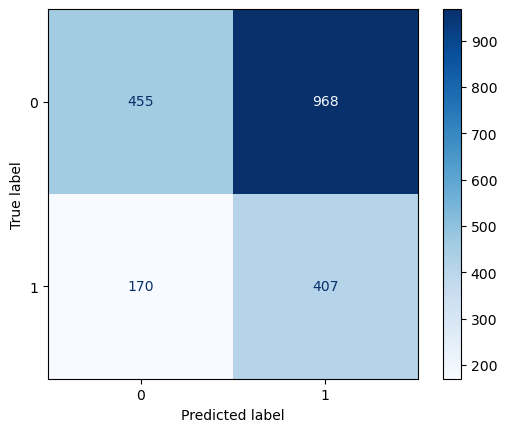

In [91]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict using best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Classification report
print(" Classification Report (Best XGBoost + SMOTE):")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")


In [ ]:
'''
After applying GridSearchCV for hyperparameter tuning on the XGBoost model with SMOTE, we achieved a better balance between the classes. 
The optimal parameters found were a learning rate of 0.01, max depth of 3, and 100 estimators, which helped the model significantly improve 
its recall for the failure class (1) from 42% to 71%, meaning it now captures most of the actual failures. However, this came at the cost of 
precision and overall accuracy, which dropped to 43%. The confusion matrix confirms this: the model correctly predicted 407 failures (True Positives)
but also misclassified 968 non-failures as failures (False Positives). This high number of false alarms is acceptable in many industrial applications 
where missing a failure is costlier than a false alert. Thus, the tuned model is now more effective for real-world predictive maintenance, focusing 
on minimizing undetected failures.
'''

In [119]:
import numpy as np


single_input = np.array([[309.7, 55.3, 1643, 238]])  #[Process Temperature, Torque, Rotational Speed, Tool Wear]

#  Predict class (0: No Failure, 1: Failure)
predicted_class = best_model.predict(single_input)[0]


predicted_proba = best_model.predict_proba(single_input)[0][1]  # Probability of failure (class 1)


print(" Predicted Failure Class:", predicted_class)
print(" Probability of Failure:", round(predicted_proba, 3))

#Applying  Condition
if predicted_class == 1:
    print(" Warning: The machine is predicted to FAIL. Immediate attention recommended.")
else:
    print(" Status: The machine is operating normally. No failure expected.")


 Predicted Failure Class: 0
 Probability of Failure: 0.464
 Status: The machine is operating normally. No failure expected.


In [123]:
import numpy as np


single_input = np.array([[320.0, 60 , 2000, 315]])  #[Process Temperature, Torque, Rotational Speed, Tool Wear]


#  Predict class (0: No Failure, 1: Failure)
predicted_class = best_model.predict(single_input)[0]

 
predicted_proba = best_model.predict_proba(single_input)[0][1]  # Probability of failure (class 1)


print(" Predicted Failure Class:", predicted_class)
print(" Probability of Failure:", round(predicted_proba, 3))

#Applying  Condition
if predicted_class == 1:
    print(" Warning: The machine is predicted to FAIL. Immediate attention recommended.")
else:
    print(" Status: The machine is operating normally. No failure expected.")

 Predicted Failure Class: 1
 Probability of Failure: 0.551


In [ ]:
'''
The comparison between the non-failure and failure cases reveals how specific operational parameters influence the machine’s predicted health status. 
In the non-failure case ([309.7, 55.3, 1643, 238]), the process temperature, torque, rotational speed, and tool wear remain within moderate levels, 
resulting in a prediction class of 0 with a probability of failure at 0.464, indicating normal operation. However, in the failure case 
([320.0, 60, 2000, 315]), each parameter is noticeably higher — especially the process temperature , rotational speed , and tool wear, which increases 
mechanical stress and wear, prompting the model to return a failure prediction (class 1) with a higher probability of 0.551. This contrast highlights 
the model’s sensitivity to elevated input values and its effectiveness in detecting conditions that likely lead to machine failure.
'''